# Churn Prediction for Enhanced Customer Retention: Empowering SyriaTel's Telecom Business
![Telecom image](images/telecom-image.jpg)

## Overview
In today's competitive telecommunications landscape, maintaining a loyal and satisfied customer base is of paramount importance. For companies like SyriaTel, identifying and addressing customer churn – the phenomenon of customers discontinuing their services – is a critical challenge that directly impacts both financial stability and business growth. This project endeavors to leverage advanced data analysis and predictive modeling techniques to develop a robust classifier capable of identifying customers who are at risk of churn.

## Business Understanding
SyriaTel, a prominent player in the telecommunications industry, faces a significant challenge in retaining its customer base. As customer preferences evolve and competition intensifies, minimizing churn, the departure of customers, becomes essential for maintaining financial stability and sustainable growth. This project seeks to develop an effective predictive model that identifies customers at risk of churning, enabling SyriaTel to implement proactive strategies for customer retention.

### Goals and Objectives
1.  **Reduce Customer Service Calls**

By analyzing factors contributing to higher customer service call volumes, SyriaTel can proactively address service quality and billing issues, reducing customer frustration and potential churn.

2. **Maximize Revenue from International Calls**

The churn prediction model can help SyriaTel target customers with substantial international call usage, offering plans or incentives to encourage them to stay and continue using international services.

3. **Explore Churn Patterns**

Visualize churn rates across different categorical variables (e.g., state, international plan) to identify trends and potential influencing factors.

4.  **Improve Nighttime Service Experience**

Analyze the impact of nighttime call usage on churn and implement measures to enhance nighttime service quality. By understanding the relationship between nighttime call experience and churn, SyriaTel can invest in network improvements and service enhancements during nighttime hours.

5. **Resource Optimization** 
With insights into which customers are more likely to churn, Syriatel can allocate its resources – be it marketing efforts, customer support, or promotional activities – more strategically and efficiently.

### Problem Statement
In the dynamic landscape of the telecommunications industry, fierce competition among various companies has become the norm. With multiple providers vying for market share and customer loyalty, maintaining a strong customer base has become increasingly challenging. One of the most pressing issues faced by telecom companies is the phenomenon of customer churn. As customers are presented with an array of options and enticing offers, telecom companies are confronted with the critical challenge of retaining their customers and ensuring long-term business viability.

Syriatel, a prominent player in the telecommunications sector, is not immune to the challenges posed by heightened competition. As a leading provider, Syriatel recognizes the urgency of addressing customer churn head-on. To this end, Syriatel seeks to leverage advanced data analytics and predictive modeling techniques to enhance its customer retention strategies.

The focus of this project is to create a robust churn prediction model that can anticipate when customers are at risk of churning. By harnessing the power of historical customer data, encompassing variables such as call patterns, account information, and service interactions, the proposed model aims to effectively categorize customers into segments based on their likelihood of churning. This predictive tool will serve as a proactive means for Syriatel to take targeted actions, implementing personalized retention initiatives and customer-centric interventions.

## Data Understanding
In the provided dataset, we have a comprehensive collection of attributes that capture key aspects of customer interactions and behavior within the telecommunications world. The dataset encompasses details such as the customer's geographical location (state), account specifics (account length, area code), communication preferences (international plan, voice mail plan), and engagement levels (number of voice mail messages). Furthermore, the dataset dives into call usage patterns, including the duration and charges associated with daytime, evening, and nighttime calls, as well as international calls. Additionally, the dataset includes information on the number of calls made, the charges incurred, and the customer service interactions. Of particular importance is the binary "churn" indicator, which signifies whether a customer has ceased using SyriaTel's services. This dataset offers a comprehensive view of customer behavior, usage patterns and potential churn-related factors, forming the foundation for predictive modeling to anticipate and address customer churn in the telecommunications industry.

#### These are the columns present and a brief information about each:

| Column Name            | Description                                             |
|------------------------|---------------------------------------------------------|
| state                  | The state where the customer is located.                |
| account length         | The duration, in days, of the customer's account with SyriaTel. |
| area code              | The area code associated with the customer's phone number. |
| phone number           | The unique phone number of the customer.                |
| international plan     | Indicates whether the customer has an international calling plan or not. |
| voice mail plan        | Indicates whether the customer has a voice mail plan or not. |
| number vmail messages  | The number of voice mail messages the customer has.     |
| total day minutes      | The total duration of daytime call usage, in minutes, by the customer. |
| total day calls        | The total number of daytime calls made by the customer. |
| total day charge       | The total charge for daytime calls incurred by the customer. |
| total eve minutes      | The total duration of evening call usage, in minutes, by the customer. |
| total eve calls        | The total number of evening calls made by the customer. |
| total eve charge       | The total charge for evening calls incurred by the customer. |
| total night minutes    | The total duration of nighttime call usage, in minutes, by the customer. |
| total night calls      | The total number of nighttime calls made by the customer. |
| total night charge     | The total charge for nighttime calls incurred by the customer. |
| total intl minutes     | The total duration of international call usage, in minutes, by the customer. |
| total intl calls       | The total number of international calls made by the customer. |
| total intl charge      | The total charge for international calls incurred by the customer. |
| customer service calls | The number of customer service calls made by the customer. |
| churn                  | The target variable indicating whether the customer has churned (stopped using SyriaTel's services) or not. |


## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold


from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("data/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Checking for the shape of the dataframe
df.shape

(3333, 21)

In [4]:
# Checking for any missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
# Checking for duplicates in the dataframe
df.duplicated().sum()

0

In [6]:
# Checking the data the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Checking the columns whose data type is object
object_columns = df.select_dtypes(['object'])
object_columns

,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no
...,...,...,...,...
3328,AZ,414-4276,no,yes
3329,WV,370-3271,no,no
3330,RI,328-8230,no,no
3331,CT,364-6381,yes,no


In [8]:
df['state'].value_counts().sort_index(ascending=True)

state
AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
Name: count, dtype: int64

In [9]:
# Converting state column dummies to allow easy processing and dropping the area code column
df_dummies = pd.get_dummies(df['state'], drop_first=True).astype('Int64')
df = pd.concat([df, df_dummies], axis=1)
df.drop(['state', 'area code'], axis=1, inplace=True)
df.head()

,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,382-4657,no,yes,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,371-7191,no,yes,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,358-1921,no,no,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,375-9999,yes,no,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,330-6626,yes,no,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Changing the international plan and voice main plan to 1s and 0s
df['international plan'] = df['international plan'].replace(['no', 'yes'], [0,1], regex=False)
df['voice mail plan'] = df['voice mail plan'].replace(['no', 'yes'], [0,1], regex=False)
df.head()

,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,382-4657,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,371-7191,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,358-1921,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,375-9999,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,330-6626,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Dropping phone number column as it does not have any connection to churn column
df.drop('phone number', axis = 1, inplace=True)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0


## Data Modeling

### Base Modeling

In [12]:
X = df.drop('churn', axis=1)
y = df['churn']

# Checking to see if there is a class imbalance
y.value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [13]:
# Splitting to train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# Checking the shapes
X_train.shape, X_test.shape

((2666, 67), (667, 67))

In [14]:
# Scaling the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict_proba(X_test_scaled)[:,1]

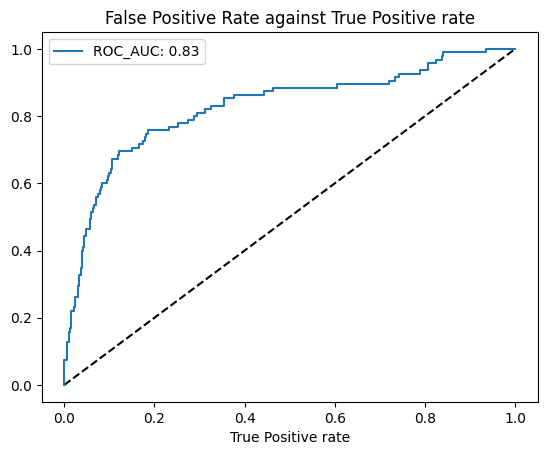

In [21]:
# Plotting the ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_score = roc_auc_score(y_test, y_pred_lr)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label=f"ROC_AUC: {roc_score:.2f}")
plt.title("False Positive Rate against True Positive rate")
plt.xlabel("False Positive rate")
plt.xlabel("True Positive rate")
plt.legend()
plt.show()

As evident from the depicted ROC Curve, the model demonstrates effective performance with an ROC AUC score of 0.83. However, it's important to note that the model faces class imbalance, where the majority class dominates and doesn't churn. Consequently, the model is susceptible to high bias, potentially favoring the majority class in its predictions.